# Project: Investigating gapminder data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#loadinspect">Load and inspect data</a></li>
        <li><a href="#compare">Compare number of countries</a></li>
        <li><a href="#dropping">Drop unneeded rows and columns</a></li>
        <li><a href="#missing">Handle missing data</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

### Questions

- How do CO2 emissions relate to the Forest Area of countries?
- How do CO2 emissions relate to the Human Development Index of a country?
- How do CO2 emissions relate to the population of a country?
- 

In [18]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.
<a id='loadinspect'></a>
### Load and inspect data

In this section, I will inspect the different datasets individually\
to familiarize myself with them and prepare them for the following analysis.

In [19]:
#load population over time dataset
pop = pd.read_csv('./gapminder_data/population_total.csv')
display(pop.info())
display(pop.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB


None

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [20]:
#load dataset with CO2 emissions per country over time
co2 = pd.read_csv('./gapminder_data/co2_emissions_tonnes_per_person.csv')
display(co2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 220 entries, country to 2018
dtypes: float64(215), object(5)
memory usage: 333.6+ KB


None

In [21]:
display(co2.head())

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


In [22]:
#load data for forest area in square kilometers
forest_area = pd.read_csv('./gapminder_data/forest_area_sq_km.csv')
display(forest_area.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  214 non-null    object
 1   1990     210 non-null    object
 2   1991     210 non-null    object
 3   1992     210 non-null    object
 4   1993     210 non-null    object
 5   1994     210 non-null    object
 6   1995     210 non-null    object
 7   1996     210 non-null    object
 8   1997     210 non-null    object
 9   1998     210 non-null    object
 10  1999     210 non-null    object
 11  2000     214 non-null    object
 12  2001     210 non-null    object
 13  2002     210 non-null    object
 14  2003     210 non-null    object
 15  2004     210 non-null    object
 16  2005     210 non-null    object
 17  2006     210 non-null    object
 18  2007     210 non-null    object
 19  2008     210 non-null    object
 20  2009     210 non-null    object
 21  2010     214 non-null    object
 22  20

None

In [23]:
display(forest_area.head())

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2
1,Afghanistan,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,...,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k
2,Angola,793k,791k,790k,788k,786k,785k,783k,782k,780k,...,716k,710k,705k,699k,694k,688k,683k,677k,672k,666k
3,Albania,7890,7870,7850,7830,7810,7790,7770,7750,7730,...,7830,7850,7860,7880,7890,7890,7890,7890,7890,7890
4,Andorra,160,160,160,160,160,160,160,160,160,...,160,160,160,160,160,160,160,160,160,160


In [24]:
life_exp = pd.read_csv('./gapminder_data/life_expectancy_years.csv')
display(life_exp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


None

In [25]:
display(life_exp.head())

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


<a id='compare'></a>
### Compare number of countries

In [26]:
#save datasets in dictionary for iteration
datasets = [pop, co2, forest_area, life_exp]
names = ['Population', 'CO2', 'Forest Area', 'Life Expectancy']
ds_dict = dict(zip(names, datasets))

#define function for counting countries,
#will be needed again
def get_num_countries():
    for key, val in ds_dict.items():
        print('Number of countries in {}: {}'.format(key, val.country.nunique()))
        
#compare countries
get_num_countries()

Number of countries in Population: 197
Number of countries in CO2: 194
Number of countries in Forest Area: 214
Number of countries in Life Expectancy: 195


In [27]:
#save country columns as sets and
#look at the difference
sets = [set(ds.country) for ds in datasets]
combined_diff = []

import itertools

#compare each set with all others
for x, y in itertools.combinations(sets, 2):
    combined_diff += x.difference(y)

combined_diff = sorted(set(combined_diff))
print(combined_diff)
print(len(combined_diff))

['American Samoa', 'Aruba', 'Bermuda', 'British Virgin Islands', 'Cayman Islands', 'Channel Islands', 'Curaçao', 'Faeroe Islands', 'French Polynesia', 'Gibraltar', 'Greenland', 'Guam', 'Holy See', 'Hong Kong, China', 'Isle of Man', 'Liechtenstein', 'Monaco', 'New Caledonia', 'Northern Mariana Islands', 'Puerto Rico', 'San Marino', 'Sint Maarten (Dutch part)', 'St. Martin (French part)', 'Taiwan', 'Turks and Caicos Islands', 'Virgin Islands (U.S.)']
26


<a id='dropping'></a>
### Drop unneeded rows and columns

There are 26 countries that do not appear in all datasets.<br/>
Since all of them are very small and/or sparsely populated,<br/>
I drop these rows from the datasets.

In [28]:
for ds in datasets:
    #get indexes of rows to drop
    to_drop = ds[ds['country'].isin(combined_diff)].index
    #drop rows accordingly
    ds.drop(to_drop, axis=0, inplace=True)

#check if number of countries matches now
get_num_countries()          

Number of countries in Population: 191
Number of countries in CO2: 191
Number of countries in Forest Area: 191
Number of countries in Life Expectancy: 191


Now that I have the same countries in all the datasets,<br/>
I also want to look at the same timeframes in all of them, if possible.</br>
I will look only at data after 1949, so I drop the columns<br/>
the columns I don't need.

In [29]:
# drop data from 1800 to 1949 from all datasets,
#except forest Area, which only starts in 1990
{val.drop(val.loc[:, '1800':'1949'], axis=1, inplace=True) for key, val in ds_dict.items() if key != 'Forest Area'}

{None}

In [30]:
life_exp.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,42.7,42.9,43.1,43.5,43.3,43.9,44.1,44.3,44.5,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,45.6,45.6,45.6,45.6,45.6,45.5,45.7,45.8,45.9,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,52.2,53.6,54.5,55.4,56.1,56.3,58.0,59.3,61.0,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,74.6,74.7,74.8,75.0,75.1,75.2,75.3,75.4,75.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,58.4,58.5,58.6,58.7,58.8,58.9,58.8,59.3,59.6,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


<a id='missing'></a>
### Handle missing data

There are no missing values in the population and life expectancy datasets,</br>
but there are several in the CO2, Forest Area datasets.

In [33]:
#check for NaN values
for key, val in ds_dict.items():
    missing = val.isna().sum()
    print(missing)
    display('Number of missing values per column in {}: {}'.format(key, [missing[x] for x in missing if missing[x] != 0]))
    display('Number of columns with missing values in {}: {}'.format(key, len([missing[x] for x in missing if missing[x] != 0])))

country    0
1950       0
1951       0
1952       0
1953       0
          ..
2096       0
2097       0
2098       0
2099       0
2100       0
Length: 152, dtype: int64


'Number of missing values per column in Population: []'

'Number of columns with missing values in Population: 0'

country     0
1950       56
1951       54
1952       53
1953       53
           ..
2014        0
2015        0
2016        0
2017        0
2018        0
Length: 70, dtype: int64


'Number of missing values per column in CO2: [1, 1, 1, 5, 14, 14, 14, 14, 14, 17, 17, 17, 17, 17, 17, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 50, 53, 54, 54, 56, 56, 56, 56, 56, 56, 56, 56]'

'Number of columns with missing values in CO2: 47'

country    0
1990       2
1991       2
1992       2
1993       2
1994       2
1995       2
1996       2
1997       2
1998       2
1999       2
2000       0
2001       2
2002       2
2003       2
2004       2
2005       2
2006       2
2007       2
2008       2
2009       2
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       1
2020       1
dtype: int64


'Number of missing values per column in Forest Area: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]'

'Number of columns with missing values in Forest Area: 21'

country    0
1950       0
1951       0
1952       0
1953       0
          ..
2096       7
2097       7
2098       7
2099       7
2100       7
Length: 152, dtype: int64


'Number of missing values per column in Life Expectancy: []'

'Number of columns with missing values in Life Expectancy: 0'

#### Fix missing values in CO2
A bar chart of the missing values in CO2 shows that there are quite a lot,</br>
so I don't want to drop the affected rows or replace the values with 0. 
</br>Instead I use the pandas `interpolate()` function to fill in the missing values.

In [1265]:
#get all missing values and exclude 'country' column 
co2_missing = co2.iloc[:, 1:].apply(lambda x: x.isna().sum() if np.any(x.isna()) else 0, axis=1)

#filter for values < 0 and save their indexes
inds = np.where(co2_missing != 0)
#unpack the returned tuple into a Series
inds = pd.Series(*inds)

#get country names for rows with missing values
ctries_miss = co2['country'][inds + 1]

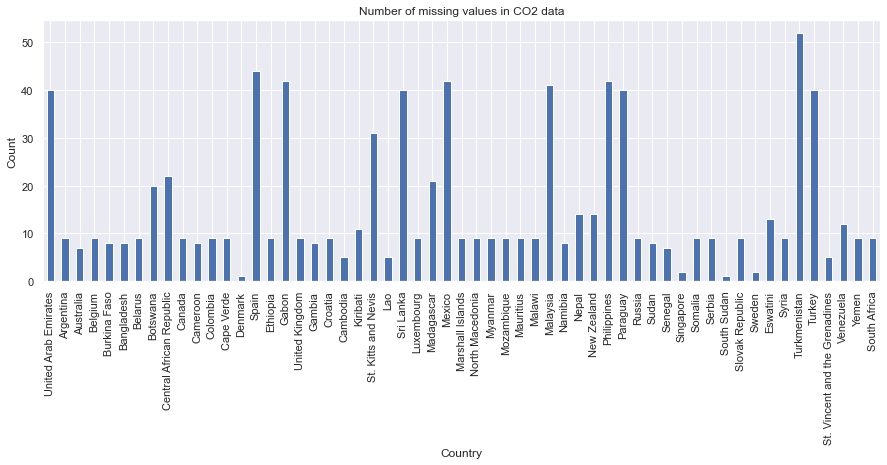

In [1266]:
#set chart size
plt.figure(figsize=(15, 4.8))

#plot bar chart
co2_missing.iloc[inds].plot(kind='bar')
plt.xticks(np.arange(0, len(inds)), ctries_miss)

#labeling 
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of missing values in CO2 data');

In [1267]:
#save 'country' column
countries = co2['country']

#interpolate doesn't work with object type columns
#so drop the country column and concatenate it back
#after interpolating
co2.drop(columns=['country'], inplace=True)
co2.interpolate(method='values', axis=0, inplace=True)

co2 = pd.concat([countries, co2], axis=1)

In [1268]:
#check dataframe
co2.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.010900,0.011700,0.011500,0.013200,0.013100,0.018600,0.021800,0.034400,0.038000,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,0.041100,0.054000,0.066100,0.057000,0.070600,0.082200,0.097700,0.119000,0.112000,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,0.235000,0.313000,0.284000,0.307000,0.363000,0.467000,0.576000,1.000000,0.779000,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,0.743333,0.878667,0.869333,0.851333,0.905333,1.014667,1.157333,1.483333,1.262667,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,1.251667,1.444333,1.454667,1.395667,1.447667,1.562333,1.738667,1.966667,1.746333,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


#### Fix missing values in Life Expectancy


In [1269]:
life_exp.isna().sum()

country    0
1950       0
1951       0
1952       0
1953       0
          ..
2096       7
2097       7
2098       7
2099       7
2100       7
Length: 152, dtype: int64

(191, 32)


145     2
166    19
175    19
dtype: int64

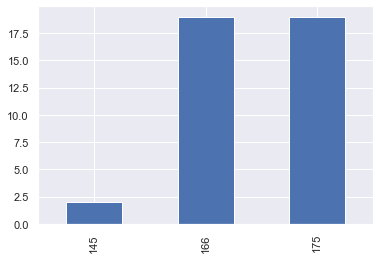

In [1270]:
life_exp_missing = life_exp.iloc[:, 1:].apply(lambda x: x.isna().sum() if np.any(x.isna()) else 0, axis=1)
inds = np.where(forest_missing != 0)
inds = pd.Series(*inds)

forest_missing.iloc[inds].plot(kind='bar')
print(forest_area.shape)
display(forest_missing.iloc[inds])


> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [1271]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#duplicates
#datatypes
#uniformity (units)


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [1272]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [1273]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!